**IMPORTING REQUIRED LIBRARIES**

In [7]:
#LIBRARIES FOR NUMERICAL OPERATIONS AND DATA HANDLINGS
import numpy as np #importing numpy library as np alias.
import pandas as pd #importing pandas library as pd alias.

#LIBRARY FOR UNDERSTANDING THE RAW DATA IN A REPORT
import sweetviz as sv #importing sweetviz library as sv alias.

#LIBRARIES FOR PERFORMING VISUALIZATION
import matplotlib.pyplot as plt #importing plotly in matplotlib library as plt alias.
import seaborn as sns #importing seaborn library as sns alias.
import plotly.graph_objs as go #importing the graph objects module from the Plotly library with an alias "go". 
from plotly.offline import init_notebook_mode, iplot #importing init_notebook_mode, iplot from plotly.offline library.
 
#LIBRARIES USED FOR FEATURE ENGINEERING TECHNIQUES    
import json #importing json library.
import datetime #importing datetime library.
from datetime import datetime #importing datetime module from datetime library.

#LIBRARY FOR SPLITING THE DATA AS TRAIN AND TEST
from sklearn.model_selection import train_test_split #importing train_test_split from sklearn.model_selection library.

#LIBRARIES USED FOR MODEL BUILDING
import lightgbm as lgb #importing lightbgm as lbg alias.
from lightgbm import LGBMRegressor #importing LGBMRegressor module from lightbgm.
import statsmodels.api as sm #importing sm module from statsmodels.api library.
from statsmodels.tsa.arima.model import ARIMA #importing ARIMA module from statsmodels.tsa.arima.model library.

#LIBRARIES USED FOR EVALUATION METRICS
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error #importing mean_absolute_error from sklearn.metrics 
 #importing r2_score from sklearn.metrics 
 #importing mean_squared_error from sklearn.metrics 
 #importing mean_absolute_percentage_error from sklearn.metrics 


**LOADING THE DATA INTO NOTEBOOK**

In [50]:
train = pd.read_csv("/kaggle/input/hackathon/train_data.csv") #LOADING THE train_data IN NOTEBOOK AS 'train'
test = pd.read_csv("/kaggle/input/hackathon/test_data.csv") #LOADING THE test_data IN NOTEBOOK AS 'test'
foot_fall = pd.read_csv('/kaggle/input/hackathon/foot_fall.csv') #LOADING THE foot_fall IN NOTEBOOK AS 'foot_fall'
sample_submission = pd.read_csv("/kaggle/input/hackathon/testdata_target.csv") #LOADING THE testdata_target IN NOTEBOOK AS 'test_tar'

*In the above cell we are loading the data into notebook by giving a unique data frames to each dataset*

**GENERATING DATA ANALYSIS REPORT**

In [52]:
my_report = sv.analyze(train) #By my_report dataframe we are generating the analysis of our traindata
my_report.show_html() # now it will generate to "SWEETVIZ_REPORT.html

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


*From the above cell we are generating the train data analysis 
we analysed the data distributions,null values, duplicates, datatypes*

**DATA SUMMARIZING**

In [53]:
train.shape #this code helps to get the count of rows and columns in train data

(22624345, 6)

*From the above cell we can conclude that
we have 22624345 rows and 6 columns in our train data*

In [54]:
test.shape #this code helps to get the count of rows and columns in test data


(773535, 6)

*From the above cell we can conclude that we have 773535 rows and 6 columns in our train data*

In [55]:
train.head(5) #this code helps to get the top 5 rows in train data

,year,month,day,city,medicine,sales
0,2015,1,2,1,1,24.0
1,2015,1,2,1,2,144.0
2,2015,1,2,1,3,84.0
3,2015,1,2,1,4,24.0
4,2015,1,2,1,5,8.0


*From the above cell we can observe the first 5 rows in our raw train dataset*

In [56]:
test.head(5) #this code helps to get the top 5 rows in test data

,id,year,month,day,city,medicine
0,1,2018,7,1,1,1292
1,2,2018,7,1,1,1
2,3,2018,7,1,1,2
3,4,2018,7,1,1,3
4,5,2018,7,1,1,4


*From the above cell we can observe the first 5 rows in our raw test dataset*

In [57]:
foot_fall.head(5) #this code helps to get the top 5 rows in foot_fall data

,city,2015-01-02,2015-01-03,2015-01-04,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-10,...,2018-06-21,2018-06-22,2018-06-23,2018-06-24,2018-06-25,2018-06-26,2018-06-27,2018-06-28,2018-06-29,2018-06-30
0,Ahmedabad,9384.0,6808.0,8064.0,10248.0,11180.0,6876.0,6436.0,7104.0,5924.0,...,9624.0,10476.0,9584.0,11940.0,13040.0,12144.0,10164.0,9784.0,10472.0,10040.0
1,Bangalore,16644.0,14640.0,15660.0,19056.0,19740.0,14280.0,12740.0,13480.0,11928.0,...,12412.0,13392.0,11948.0,13860.0,16384.0,16192.0,12388.0,12124.0,13412.0,12172.0
2,Chennai,19544.0,13752.0,13736.0,19740.0,21604.0,12820.0,12244.0,11956.0,10508.0,...,10420.0,11044.0,10320.0,11988.0,15248.0,15188.0,10596.0,9716.0,10776.0,10336.0
3,Delhi,16832.0,13256.0,14520.0,17324.0,17672.0,13356.0,12408.0,13072.0,10788.0,...,12308.0,11772.0,11492.0,13284.0,16224.0,15688.0,11728.0,11164.0,12272.0,11692.0
4,Hyderabad,13588.0,11548.0,11600.0,16336.0,18364.0,10788.0,9280.0,9264.0,8848.0,...,8832.0,8756.0,8528.0,9464.0,13356.0,14384.0,8900.0,7792.0,8420.0,9240.0


*From the above cell we can observe the first 5 rows in our raw foot_fall dataset*

In [58]:
train.info() #this code helps to get the columns with their datatypes and range index and memory usage by the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22624345 entries, 0 to 22624344
Data columns (total 6 columns):
 #   Column    Dtype  
---  ------    -----  
 0   year      int64  
 1   month     int64  
 2   day       int64  
 3   city      int64  
 4   medicine  int64  
 5   sales     float64
dtypes: float64(1), int64(5)
memory usage: 1.0 GB


*From the above cell we understood that 
data contains 22624344 rows
data contains 6 attribues (1-float,5int64)*

In [59]:
test.info() #this code helps to get the columns with their datatypes and range index and memory usage by the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773535 entries, 0 to 773534
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   id        773535 non-null  int64
 1   year      773535 non-null  int64
 2   month     773535 non-null  int64
 3   day       773535 non-null  int64
 4   city      773535 non-null  int64
 5   medicine  773535 non-null  int64
dtypes: int64(6)
memory usage: 35.4 MB


*From the above cell we understood that data contains 773535 rows data contains 6 attribues (6int64)*

In [60]:
train.describe() #this code helps to get statistical analysis of every numerical attribute

,year,month,day,city,medicine,sales
count,2.262434e+07,2.262434e+07,2.262434e+07,2.262434e+07,2.262434e+07,2.262434e+07
mean,2.016510e+03,6.220520e+00,1.572557e+01,5.488639e+00,1.169635e+03,5.166032e+01
std,1.023379e+00,3.449989e+00,8.789664e+00,2.849396e+00,8.016848e+02,1.100297e+02
min,2.015000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-9.948000e+03
25%,2.016000e+03,3.000000e+00,8.000000e+00,3.000000e+00,5.110000e+02,1.200000e+01
50%,2.017000e+03,6.000000e+00,1.600000e+01,5.000000e+00,1.034000e+03,2.800000e+01
75%,2.017000e+03,9.000000e+00,2.300000e+01,8.000000e+00,1.718000e+03,5.600000e+01
max,2.018000e+03,1.200000e+01,3.100000e+01,1.000000e+01,3.389000e+03,8.299200e+04


*From the above cell we are analysing the statistical analysis of every numerical data*

**PREPROCESSING**

In [61]:
train.duplicated().sum() #this code helps to know whether there are any duplicates in train data.

1827

*From the above cell we conclude that there are 1827 duplicate values in train data*

In [62]:
test.duplicated().sum() #this code helps to know whether there are any duplicates in test data.

0

*From the above cell we conclude that there are 0 duplicate values in train data*

In [63]:
train.drop_duplicates(inplace=True) # This code helps us for dropping the duplicates.

*From the above cell we removed 1827 duplicate values from train data*

In [64]:
train.isnull().sum() #This code helps us for checking the null values in train data.

year        0
month       0
day         0
city        0
medicine    0
sales       0
dtype: int64

*we found that there are no null values in train data*

In [65]:
train.dtypes #This code helps us for checking the data types of every column in train data.

year          int64
month         int64
day           int64
city          int64
medicine      int64
sales       float64
dtype: object

*We found that there are 5 attributes with int64 data type and 1 attribute with float64 datatype*

In [66]:

train['datetime'] = pd.to_datetime(train[['year', 'month', 'day']]) #Extracting datetime column to year,month and day.
train['Dayofweek'] = train.datetime.dt.dayofweek #Adding new feature "Dayofweek"
train['week'] = train['datetime'].dt.isocalendar().week #Adding new feature "week"
train['quarter'] = train['datetime'].dt.quarter #Adding new feature "quarter"
train['day_of_year'] = train['datetime'].dt.day_of_year #Adding new feature "day_of_year"
train['Date_is_weekend'] = np.where(train['Dayofweek'].isin([5,6]), 1,0) #Adding new feature "Date_is_weekend"

*From the above cell we Extracted and Added few features to our train data as*
* datetime -  extracted to year, month and day
* Dayofweek - which day was it in a week (day1-day7)
* week - which week was that in that year (week1-week53)
* quarter - which quarter was that in that year (quarter1-quarter4)
* day_of_year -  which day was that in that year (day1- day365)
* Date_is_weekend - we are considering day 5, day6 as weekends,and creating a columns if it is day5 then 1 else 0

In [67]:
# Extracting and Adding new features to the train data
test['datetime'] = pd.to_datetime(test[['year', 'month', 'day']]) #Extracting datetime column to year,month and day.
test['Dayofweek'] = test.datetime.dt.dayofweek #Adding new feature "Dayofweek"
test['week'] = test['datetime'].dt.isocalendar().week #Adding new feature "week"
test['quarter'] = test['datetime'].dt.quarter #Adding new feature "quarter"
test['day_of_year'] = test['datetime'].dt.day_of_year #Adding new feature "day_of_year"
test['Date_is_weekend'] = np.where(test['Dayofweek'].isin([5,6]), 1,0) #Adding new feature "Date_is_weekend"

*From the above cell we Extracted and Added few features to our train data as*
* datetime -  extracted to year, month and day
* Dayofweek - which day was it in a week (day1-day7)
* week - which week was that in that year (week1-week53)
* quarter - which quarter was that in that year (quarter1-quarter4)
* day_of_year -  which day was that in that year (day1- day365)
* Date_is_weekend - we are considering day 5, day6 as weekends,and creating a columns if it is day5 then 1 else 0

In [68]:
# Converting necessary cols to categorical in train data
catt_attr = ['city', 'medicine', 'year', 'month', 'day', 'Dayofweek','week','day_of_year', 'quarter', 'Date_is_weekend']
for col in catt_attr:
    train[col] = train[col].astype('category')

*We converted the necessary columns from int64 datatype to categorical datatype*

In [69]:
test.dtypes #this code helps to get the datatypes of test datatypes.

id                          int64
year                        int64
month                       int64
day                         int64
city                        int64
medicine                    int64
datetime           datetime64[ns]
Dayofweek                   int64
week                       UInt32
quarter                     int64
day_of_year                 int64
Date_is_weekend             int64
dtype: object

*We see that there are 6 attribute which are in int64 datatype*

In [70]:
# Converting cols to categorical in train data
for col in ['city', 'medicine', 'year', 'month', 'day', 'Dayofweek','week',
       'day_of_year', 'quarter', 'Date_is_weekend'] :
    test[col] = test[col].astype('category')

*We converted the necessary columns from int64 datatype to categorical datatype*

**EXPLORATORY DATA ANALYSIS**

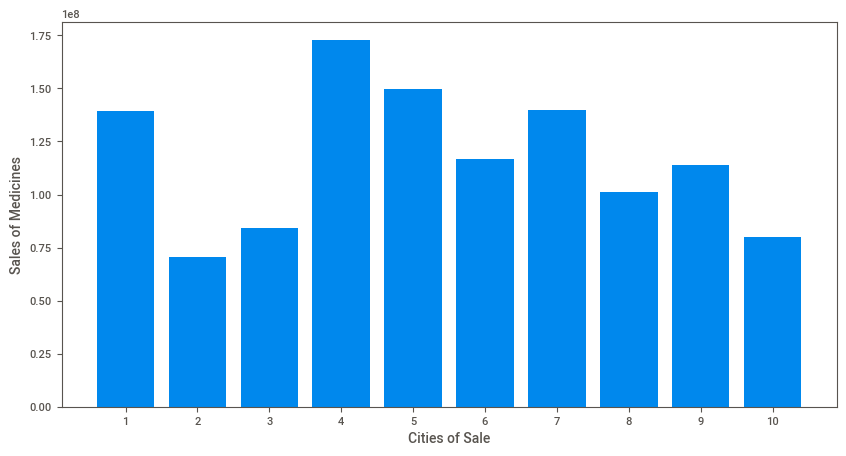

In [71]:
#creating a count plot for city and thier sales
citySales = train.groupby('city').sales.sum()
cities = range(1,11)
plt.figure(figsize=(10,5))
plt.bar(cities, citySales)
plt.ylabel('Sales of Medicines')
plt.xlabel('Cities of Sale')
plt.xticks(cities)
plt.show()

*From the above plot we can analyse that there are*
* high sales in 4th city (Mumbai) 
* low sales in 2nd city(Others)

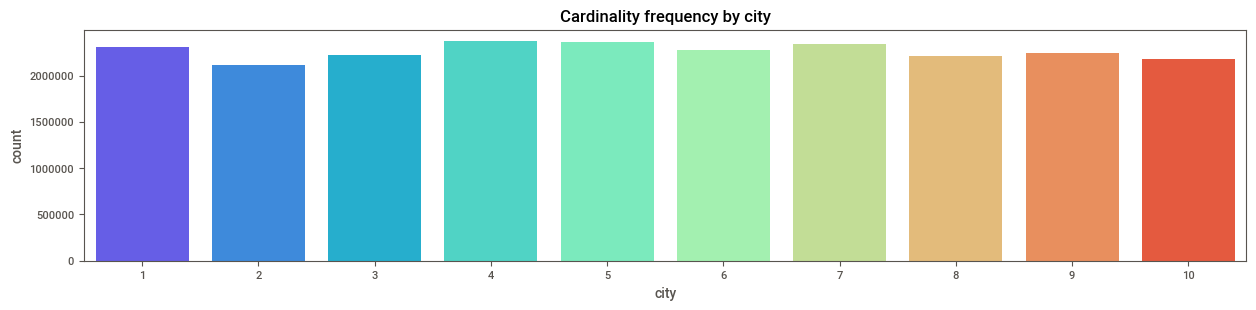

In [31]:
# create a countplot of cadinality frequency by cities
plt.figure(figsize=(15,3))
sns.countplot(x='city',data=train, palette='rainbow')
plt.title("Cardinality frequency by city")
plt.show()

*From the above count plot we can analyse the frequency of cities*
* Low sales in 2nd city (others)
* High sales in cities like mumbai,kolkata and delhi

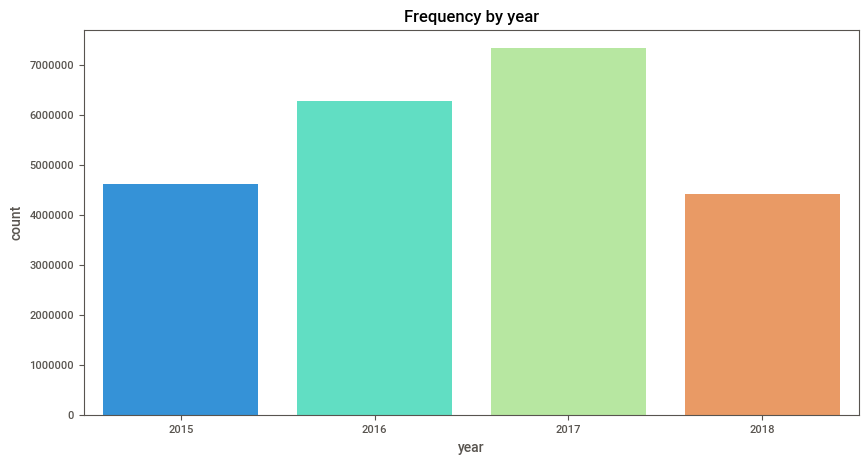

In [32]:
# create a countplot of cardinality check for number by year
plt.figure(figsize=(10,5))
sns.countplot(x='year',data=train, palette='rainbow')
plt.title("Frequency by year")
plt.show()

*From the above cell we analyse that*
* 2017 has more number of sales
* 2015 has less number of sales


In [33]:
#plot for checking the daily sales trend 
train_daily = train.copy()
train_daily.drop(['year','month','day','city','medicine'],axis=1,inplace=True)
train_daily = train_daily.groupby(train_daily['datetime']).sum()
daily_sales = go.Scatter(x=train_daily.index, y=train_daily['sales'])
layout = go.Layout(title='Daily sales', xaxis=dict(title='Date'), yaxis=dict(title='Sales'))
fig = go.Figure(data=[daily_sales], layout=layout)
iplot(fig)

*From the above plot we can get insights as*
* year by year sales are increasing.
* sudden increase in sales on feb 28 2018.

In [34]:
#plot for checking the weekly sales trend 
train_weeklyly = train.copy()
train_weeklyly.drop(['year','month','day','city','medicine','datetime'],axis=1,inplace=True)
train_weeklyly = train_weeklyly.groupby(train_weeklyly['week']).sum()
weeklysales = go.Scatter(x=train_weeklyly.index, y=train_weeklyly['sales'])
layout = go.Layout(title='Weekly sales', xaxis=dict(title='Weekly'), yaxis=dict(title='Sales'))
fig = go.Figure(data=[weeklysales], layout=layout)
iplot(fig)

*We can get insights from above plot is*
* As every year dont have 53 weeks there is less sales in 53rd week
* We can understand that there is high sales in 51st week and lowest in 34rd week

In [35]:
#plot for checking the weekly sales trend 
train_dayofweek = train.copy()
train_dayofweek.drop(['year','month','day','city','medicine'],axis=1,inplace=True)
train_dayofweek = train_dayofweek.groupby(train_dayofweek['Dayofweek']).sum()
weeksales = go.Scatter(x=train_dayofweek.index, y=train_dayofweek['sales'])
layout = go.Layout(title='weekly sales', xaxis=dict(title='dayofweek'), yaxis=dict(title='Sales'))
fig = go.Figure(data=[weeksales], layout=layout)
iplot(fig)

*We can get insights from above plot is*

* As on 1st day of week there are high sales and on 6th day least sales.

In [36]:
#plot for checking the monthly sales trend 
train_month = train.copy()
train_month.drop(['year','day','city','medicine'],axis=1,inplace=True)
train_month = train_month.groupby(train_month['month']).sum()
monthlysales = go.Scatter(x=train_month.index, y=train_month['sales'])
layout = go.Layout(title='monthly sales', xaxis=dict(title='Month'), yaxis=dict(title='Sales'))
fig = go.Figure(data=[monthlysales], layout=layout)
iplot(fig)

*We can get insights from above plot is*

* there is a down trend of sales on 7th and 8th month.
* increse of sales in 12th month.

In [37]:
#plot for checking the yearly sales trend 
train_year = train.copy()
train_year.drop(['month','day','city','medicine'],axis=1,inplace=True)
train_year = train_year.groupby(train_year['year']).sum()
yearlysales = go.Scatter(x=train_year.index, y=train_year['sales'])
layout = go.Layout(title='Yearly sales', xaxis=dict(title='Year'), yaxis=dict(title='Sales'))
fig = go.Figure(data=[yearlysales], layout=layout)
iplot(fig)

*We can get insights from above plot is*

* There are least sales in 2015 and 2018.
* there are high sales in 2017.

In [72]:
# Parsing dates for foot-fall data

def parser(x):
    if '-' in x:
        x = x.replace('-', '/')
    return datetime.strptime(x,'%Y/%m/%d')

*from the above cell we are defining the function as parser with argument x.
if the date in data is present with '-' then it will replace with '/'*

In [73]:
#loading and calling the city_map file
with open('/kaggle/input/city-map/city_dict.json') as cities:
    city_map = json.load(cities)
    city_map = dict([(value, key) for key, value in city_map.items()])
for key in city_map:
    city_map[key] = int(city_map[key])
city_map

{'Mumbai': 4,
 'Delhi': 5,
 'Bangalore': 7,
 'Kolkata': 1,
 'Chennai': 6,
 'Hyderabad': 8,
 'Ahmedabad': 9,
 'Jaipur': 3,
 'Lucknow': 10,
 'Other': 2}

In [74]:
foot_fall

,city,2015-01-02,2015-01-03,2015-01-04,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-10,...,2018-06-21,2018-06-22,2018-06-23,2018-06-24,2018-06-25,2018-06-26,2018-06-27,2018-06-28,2018-06-29,2018-06-30
0,Ahmedabad,9384.0,6808.0,8064.0,10248.0,11180.0,6876.0,6436.0,7104.0,5924.0,...,9624.0,10476.0,9584.0,11940.0,13040.0,12144.0,10164.0,9784.0,10472.0,10040.0
1,Bangalore,16644.0,14640.0,15660.0,19056.0,19740.0,14280.0,12740.0,13480.0,11928.0,...,12412.0,13392.0,11948.0,13860.0,16384.0,16192.0,12388.0,12124.0,13412.0,12172.0
2,Chennai,19544.0,13752.0,13736.0,19740.0,21604.0,12820.0,12244.0,11956.0,10508.0,...,10420.0,11044.0,10320.0,11988.0,15248.0,15188.0,10596.0,9716.0,10776.0,10336.0
3,Delhi,16832.0,13256.0,14520.0,17324.0,17672.0,13356.0,12408.0,13072.0,10788.0,...,12308.0,11772.0,11492.0,13284.0,16224.0,15688.0,11728.0,11164.0,12272.0,11692.0
4,Hyderabad,13588.0,11548.0,11600.0,16336.0,18364.0,10788.0,9280.0,9264.0,8848.0,...,8832.0,8756.0,8528.0,9464.0,13356.0,14384.0,8900.0,7792.0,8420.0,9240.0
5,Jaipur,13000.0,11616.0,11848.0,12240.0,10992.0,11072.0,10556.0,11208.0,10180.0,...,9676.0,10496.0,9556.0,10500.0,11292.0,10544.0,9632.0,9656.0,10316.0,9652.0
6,Kolkata,13948.0,12104.0,12752.0,14492.0,14360.0,11984.0,11304.0,11728.0,10596.0,...,11700.0,11884.0,10488.0,12116.0,13696.0,13348.0,11576.0,10752.0,11896.0,10528.0
7,Lucknow,12308.0,9228.0,10792.0,13836.0,13188.0,9484.0,9004.0,8912.0,8208.0,...,8588.0,7640.0,7812.0,8676.0,11640.0,10536.0,8136.0,7644.0,7860.0,7880.0
8,Mumbai,19284.0,14472.0,16676.0,19684.0,19700.0,15484.0,14372.0,16024.0,13292.0,...,14068.0,15404.0,14088.0,16368.0,18800.0,18640.0,14772.0,14208.0,16044.0,14628.0
9,Other,8572.0,7180.0,6716.0,8616.0,9252.0,6852.0,6220.0,6808.0,5688.0,...,6512.0,6716.0,6164.0,6980.0,8056.0,8480.0,6480.0,6004.0,7144.0,6040.0


In [75]:

# pivot down columns to rows, apply date formats, Add city-number mapping

foot_fall = foot_fall.melt(id_vars = ["city"], var_name = "date", value_name = "footfall")
foot_fall['date'] = foot_fall['date'].astype(str).apply(lambda x: parser(x))
foot_fall = foot_fall.replace({"city": city_map})

*In the above code we are reshaping and parsing the data and to standardize the city names.*

In [76]:
# Creating additional calendar features

foot_fall['year'] = foot_fall['date'].dt.year
foot_fall['month'] = foot_fall['date'].dt.month
foot_fall['day'] = foot_fall['date'].dt.day

foot_fall['city'] = foot_fall['city'].astype(np.int8)
foot_fall = foot_fall.drop('date', axis = 1)



* From the above code we are creating new features as year, month and day 
* converting the city datatype as int8 and droping date column from the data.


In [77]:

# Fill NaNs in footfall with avg. footfall on Jan 2, 2018

mean_ff = pd.DataFrame({'footfall' : foot_fall.groupby(['city'])['footfall'].apply(lambda x: np.round(x.mean()))}).reset_index()
mean_ff.columns = ['city', 'footfall']
mean_ff = mean_ff.set_index('city')['footfall']
foot_fall['footfall'] = foot_fall['footfall'].fillna(foot_fall['city'].map(mean_ff))


* From the above code we are imputing missing values with mean values for each city and stored in new dataframe.
* by mapping method, it is used to map each city to its corresponding mean footfall value.

In [78]:
train = train.merge(foot_fall, on = ['year', 'month', 'day', 'city'], how = 'left') #merging train data with footfall on left with certain columns

*In train dataframe we are merging train with footfall on left with year month day and city column*

In [79]:
test = test.merge(foot_fall, on = ['year', 'month', 'day', 'city'], how = 'left') #merging test data with footfall on left with certain columns

*In test dataframe we are merging train with footfall on left with year month day and city column*

In [80]:
train.isnull().sum() #to check null values in train data

year                   0
month                  0
day                    0
city                   0
medicine               0
sales                  0
datetime               0
Dayofweek              0
week                   0
quarter                0
day_of_year            0
Date_is_weekend        0
footfall           49348
dtype: int64

*After merging there is probability of creating null values so we checked null values here and we got 49348 null values*

In [81]:
train['footfall'] = train['footfall'].fillna(train['city'].map(mean_ff)) #filling null values with mean
train.isnull().sum()

year               0
month              0
day                0
city               0
medicine           0
sales              0
datetime           0
Dayofweek          0
week               0
quarter            0
day_of_year        0
Date_is_weekend    0
footfall           0
dtype: int64

*We filled null values with mean of footfall values mapping with city column*

In [82]:
train.drop(['datetime'],axis=1,inplace=True) #dropping unwanted attribute

*As we extracted datetime as year month and day we are dropping datetime column*

In [83]:
test['footfall'] = test['footfall'].fillna(test['city'].map(mean_ff)) #checking null values for test data
test.isnull().sum()

id                 0
year               0
month              0
day                0
city               0
medicine           0
datetime           0
Dayofweek          0
week               0
quarter            0
day_of_year        0
Date_is_weekend    0
footfall           0
dtype: int64

*We found that there are no null values in test data*

In [84]:
test.drop(['datetime'],axis=1,inplace=True) #dropping datetime attribute from test data 
test.drop(['id'],axis=1,inplace=True) #dropping id attribute from test data

*We are removing unwanted attributes from test data*

**TRAIN TEST SPLIT**

In [85]:
X = train.drop(columns='sales',axis=1) #defining X to be consider all attributes exept target attribute (sales)
Y = train.sales # defining Y to be consider only target attribute (sales)

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=120) #spliting the data into 80-20 with random state 120

*here we are splitng the data  as X_train with 80% and X_test with 20% and Y_train with 80% and Y_test with 20%*

**MODEL BUILDING AND GENERATING PREDICTIONS**

In [87]:
LGB = lgb.LGBMRegressor() #building light gradient boosting machine

*defining LGB by calling LGBM regressor*

In [88]:
LGB.fit(X_train, Y_train) #fitting X_train and Y_train in LGBM regressor

LGBMRegressor()

In [89]:
y_pred = LGB.predict(X_test) #pedicting target values of X_test

In [90]:

MSE = mean_squared_error(Y_test,y_pred) #defining MSE to find mean_squared_error
MAE = mean_absolute_error(Y_test,y_pred) #defining MAE to find mean_absolute_error
R2  = r2_score(Y_test,y_pred)  #defining R@ to find r2_score
MAPE  = mean_absolute_percentage_error(Y_test,y_pred) #defining MAPE to find mean_absolute_percentage_error

print("MSE: ", MSE)
print("MAE: ", MAE)
print("R2: ", R2)
print("MAPE: ", MAPE)

MSE:  4097.473548566168
MAE:  24.176735968925883
R2:  0.6385322203907402
MAPE:  1.1204691358035335


In [91]:
# Take a random sample of 5,00,000 rows
sample_data = train.sample(n=500000, random_state=42)

In [92]:
# Split the data into train and test sets
data_train, data_test = train_test_split(sample_data, test_size=0.2, random_state=42)

# Fit ARIMA model
model = ARIMA(data_train['sales'], order=(1, 1, 1))
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(start=len(data_train), end=len(data_train)+len(data_test)-1, typ='levels')

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - data_test['sales'])**2))

print("RMSE: ",rmse)

# Calculate mean absolute percentage error (MAPE)
mape = np.mean(np.abs((data_test['sales'] - predictions) / data_test['sales']))

print("MAPE: ",mape)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



RMSE:  58.483767987641286
MAPE:  2.5535560545644707


In [93]:
predictions = LGB.predict(test) #predicting Y values for test data

In [94]:
#submitting predictions to the test_target dataset
sample_submission["sales"] = predictions
sample_submission.to_csv("sales_prediction.csv", index=False) #generating sales_prediction.csv as output